In [8]:
import AutoClassification as AC
import pandas as pd
import Preprocess as pr

In [9]:
data = pd.read_csv('./analysis_data/Ford_data.csv',index_col = 0)

In [10]:
data

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor491,sensor492,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,label
0,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,...,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343,-1.0
1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,...,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086,1.0
2,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,...,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391,-1.0
3,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,...,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736,-1.0
4,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,...,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,0.143630,-0.135823,-0.510278,-0.850804,-1.058080,-1.082756,-0.961845,-0.748399,-0.575669,-0.569500,...,0.865397,1.366315,1.896845,2.229968,2.192954,1.761128,0.939424,-0.096588,-1.076587,-1.0
4917,-0.165568,-0.504614,-0.780065,-0.937044,-0.950518,-0.854054,-0.701736,-0.544270,-0.424473,-0.357913,...,-1.916656,-1.774917,-1.439674,-0.935756,-0.298758,0.406564,1.100995,1.722323,2.191682,1.0
4918,0.710084,0.593979,0.381886,0.127285,-0.112304,-0.274140,-0.312698,-0.195008,0.063567,0.398281,...,0.272573,-0.040822,-0.235795,-0.304746,-0.270086,-0.192379,-0.126553,-0.117822,-0.189094,1.0
4919,0.006847,-0.140624,-0.270594,-0.378835,-0.461983,-0.515125,-0.538119,-0.532769,-0.495602,-0.436697,...,0.176298,-0.031868,-0.262996,-0.492936,-0.698291,-0.870596,-1.000708,-1.084108,-1.109963,1.0


In [12]:
miss_col, miss_list = pr.search_missing_value(data)
print(miss_col)
print("---------------")
print(miss_list)

[]
---------------
Series([], dtype: int64)


## Modeling

In [13]:
setting = AC.setup(data, 'label', True, True)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(4921, 501)"
5,Transformed data shape,"(4748, 501)"
6,Transformed train set shape,"(3271, 501)"
7,Transformed test set shape,"(1477, 501)"
8,Numeric features,500
9,Preprocess,True


In [15]:
setting_result = AC.save_df()
setting_result

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"-1.0: 0, 1.0: 1"
4,Original data shape,"(4921, 501)"
5,Transformed data shape,"(4748, 501)"
6,Transformed train set shape,"(3271, 501)"
7,Transformed test set shape,"(1477, 501)"
8,Numeric features,500
9,Preprocess,True


In [16]:
setting.y_train

4785    1.0
2852   -1.0
2658   -1.0
738    -1.0
163    -1.0
       ... 
3294    1.0
346     1.0
4265   -1.0
1475   -1.0
2612    1.0
Name: label, Length: 3444, dtype: float32

In [17]:
metrics = setting.get_metrics()
metrics['Name']

ID
acc           Accuracy
auc                AUC
recall          Recall
precision    Precision
f1                  F1
kappa            Kappa
mcc                MCC
Name: Name, dtype: object

In [18]:
setting.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
single_model = AC.single('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7304,0.7979,0.6429,0.7660,0.6990,0.4583,0.4641
1,0.7217,0.7858,0.6607,0.7400,0.6981,0.4416,0.4440
2,0.6812,0.7289,0.6488,0.6812,0.6646,0.3611,0.3615
3,0.6899,0.7708,0.6667,0.6871,0.6767,0.3788,0.3790
4,0.7035,0.7709,0.6429,0.7200,0.6792,0.4052,0.4075
5,0.7326,0.7934,0.6527,0.7622,0.7032,0.4625,0.4671
6,0.7384,0.8018,0.6647,0.7655,0.7115,0.4743,0.4783
7,0.7297,0.7876,0.6946,0.7342,0.7138,0.4580,0.4587
8,0.7180,0.7722,0.6707,0.7273,0.6978,0.4343,0.4356


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
single_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
single_result = AC.save_df()
single_result

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7304,0.7979,0.6429,0.7660,0.6990,0.4583,0.4641
1,0.7217,0.7858,0.6607,0.7400,0.6981,0.4416,0.4440
2,0.6812,0.7289,0.6488,0.6812,0.6646,0.3611,0.3615
3,0.6899,0.7708,0.6667,0.6871,0.6767,0.3788,0.3790
4,0.7035,0.7709,0.6429,0.7200,0.6792,0.4052,0.4075
5,0.7326,0.7934,0.6527,0.7622,0.7032,0.4625,0.4671
6,0.7384,0.8018,0.6647,0.7655,0.7115,0.4743,0.4783
7,0.7297,0.7876,0.6946,0.7342,0.7138,0.4580,0.4587
8,0.7180,0.7722,0.6707,0.7273,0.6978,0.4343,0.4356


<Axes: xlabel='Fold'>

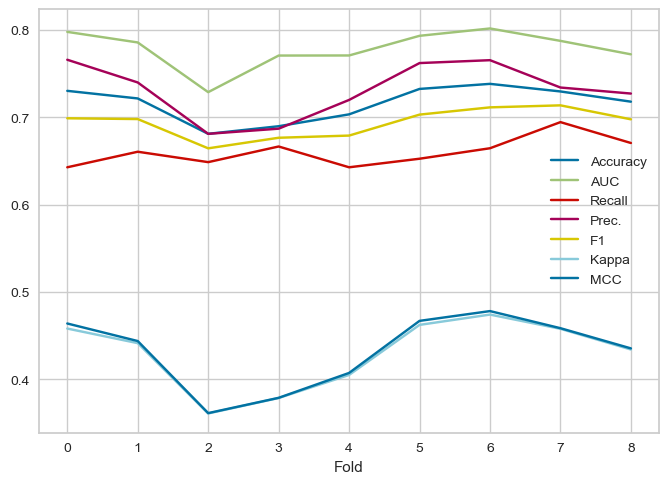

In [22]:
single_visual_result = AC.single_visual(single_result)
single_visual_result

## Model Comparing

In [23]:
best_model = AC.compare('Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8455,0.9060,0.7481,0.9200,0.8248,0.6893,0.7016,1.6790
catboost,CatBoost Classifier,0.8325,0.9073,0.8257,0.8294,0.8272,0.6646,0.6650,49.2980
xgboost,Extreme Gradient Boosting,0.7799,0.8598,0.7803,0.7707,0.7751,0.5596,0.5601,2.7730
lightgbm,Light Gradient Boosting Machine,0.7738,0.8553,0.7743,0.7644,0.7690,0.5475,0.5480,3.9150
et,Extra Trees Classifier,0.7448,0.8252,0.7146,0.7497,0.7315,0.4886,0.4894,1.5220
rf,Random Forest Classifier,0.7422,0.8141,0.6973,0.7549,0.7247,0.4829,0.4846,2.2990
knn,K Neighbors Classifier,0.7143,0.7783,0.6621,0.7277,0.6929,0.4269,0.4290,0.7100
gbc,Gradient Boosting Classifier,0.6327,0.6772,0.5892,0.6320,0.6090,0.2635,0.2647,95.7180
dt,Decision Tree Classifier,0.5711,0.5706,0.5492,0.5608,0.5547,0.1412,0.1414,2.9850
lda,Linear Discriminant Analysis,0.5177,0.4881,0.6120,0.5041,0.5524,0.0402,0.0408,1.4380


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [24]:
best_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [25]:
compare_matrix = AC.save_df()
compare_matrix

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8455,0.9060,0.7481,0.9200,0.8248,0.6893,0.7016,1.679
catboost,CatBoost Classifier,0.8325,0.9073,0.8257,0.8294,0.8272,0.6646,0.6650,49.298
xgboost,Extreme Gradient Boosting,0.7799,0.8598,0.7803,0.7707,0.7751,0.5596,0.5601,2.773
lightgbm,Light Gradient Boosting Machine,0.7738,0.8553,0.7743,0.7644,0.7690,0.5475,0.5480,3.915
et,Extra Trees Classifier,0.7448,0.8252,0.7146,0.7497,0.7315,0.4886,0.4894,1.522
rf,Random Forest Classifier,0.7422,0.8141,0.6973,0.7549,0.7247,0.4829,0.4846,2.299
knn,K Neighbors Classifier,0.7143,0.7783,0.6621,0.7277,0.6929,0.4269,0.4290,0.710
gbc,Gradient Boosting Classifier,0.6327,0.6772,0.5892,0.6320,0.6090,0.2635,0.2647,95.718
dt,Decision Tree Classifier,0.5711,0.5706,0.5492,0.5608,0.5547,0.1412,0.1414,2.985
lda,Linear Discriminant Analysis,0.5177,0.4881,0.6120,0.5041,0.5524,0.0402,0.0408,1.438


## Optimize based Random Grid Search Algorithm

In [11]:
optimize_best_model = AC.tune(best_model, 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8348,0.9554,0.9821,0.7534,0.8527,0.6719,0.7028
1,0.8406,0.9663,0.9702,0.7653,0.8556,0.6831,0.7073
2,0.8638,0.9576,0.9702,0.7951,0.8740,0.7289,0.7461
3,0.8783,0.9720,0.9821,0.8088,0.8871,0.7577,0.7746
4,0.8372,0.9649,0.9702,0.7617,0.8534,0.6763,0.7015
5,0.8372,0.9584,1.0000,0.7489,0.8564,0.6772,0.7155
6,0.8314,0.9618,0.9880,0.7466,0.8505,0.6656,0.7004
7,0.8488,0.9653,0.9701,0.7751,0.8617,0.6996,0.7211
8,0.8663,0.9768,0.9880,0.7895,0.8777,0.7342,0.7568


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
optimize_model_matrix = AC.save_df()
optimize_model_matrix

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8348,0.9554,0.9821,0.7534,0.8527,0.6719,0.7028
1,0.8406,0.9663,0.9702,0.7653,0.8556,0.6831,0.7073
2,0.8638,0.9576,0.9702,0.7951,0.8740,0.7289,0.7461
3,0.8783,0.9720,0.9821,0.8088,0.8871,0.7577,0.7746
4,0.8372,0.9649,0.9702,0.7617,0.8534,0.6763,0.7015
5,0.8372,0.9584,1.0000,0.7489,0.8564,0.6772,0.7155
6,0.8314,0.9618,0.9880,0.7466,0.8505,0.6656,0.7004
7,0.8488,0.9653,0.9701,0.7751,0.8617,0.6996,0.7211
8,0.8663,0.9768,0.9880,0.7895,0.8777,0.7342,0.7568


## Ensemble based Soft Voting

In [11]:
blend_list = ['dt','et','rf']
blender = AR.Blend(blend_list)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5594,0.5603,0.5952,0.5435,0.5682,0.1204,0.1209
1,0.6319,0.6310,0.5952,0.6289,0.6116,0.2623,0.2626
2,0.5768,0.5761,0.5476,0.5679,0.5576,0.1523,0.1524
3,0.6290,0.6290,0.6310,0.6163,0.6235,0.2579,0.2580
4,0.5291,0.5290,0.5238,0.5176,0.5207,0.0579,0.0579
5,0.6134,0.6141,0.6407,0.5944,0.6167,0.2278,0.2284
6,0.5291,0.5278,0.4850,0.5159,0.5000,0.0557,0.0558
7,0.6221,0.6219,0.6168,0.6095,0.6131,0.2438,0.2438
8,0.5581,0.5588,0.5808,0.5419,0.5607,0.1173,0.1176


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7478,0.8057,0.7262,0.7485,0.7372,0.4949,0.4951
1,0.7681,0.8467,0.7262,0.7821,0.7531,0.5351,0.5364
2,0.7536,0.8256,0.6905,0.7785,0.7319,0.5055,0.5086
3,0.7739,0.8458,0.7619,0.7711,0.7665,0.5474,0.5474
4,0.7733,0.8264,0.7679,0.7679,0.7679,0.5463,0.5463
5,0.7326,0.8284,0.7006,0.7358,0.7178,0.4639,0.4644
6,0.8023,0.8647,0.7665,0.8153,0.7901,0.6036,0.6047
7,0.7238,0.8111,0.6707,0.7368,0.7022,0.4458,0.4475
8,0.7645,0.8180,0.7246,0.7756,0.7492,0.5278,0.5289


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7391,0.7982,0.7143,0.7407,0.7273,0.4774,0.4777
1,0.7188,0.8193,0.6548,0.7383,0.6940,0.4357,0.4384
2,0.7159,0.7929,0.7262,0.7011,0.7135,0.4320,0.4323
3,0.7333,0.8206,0.7083,0.7346,0.7212,0.4658,0.4661
4,0.7064,0.7971,0.6964,0.7006,0.6985,0.4124,0.4124
5,0.7326,0.8104,0.7126,0.7301,0.7212,0.4643,0.4644
6,0.7471,0.8092,0.7605,0.7299,0.7449,0.4944,0.4948
7,0.7529,0.8218,0.7485,0.7440,0.7463,0.5055,0.5055
8,0.7122,0.7786,0.6527,0.7267,0.6877,0.4223,0.4244


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5710,0.7187,0.6012,0.5549,0.5771,0.1433,0.1437
1,0.6319,0.7884,0.5952,0.6289,0.6116,0.2623,0.2626
2,0.5797,0.7332,0.5476,0.5714,0.5593,0.1580,0.1581
3,0.6464,0.7891,0.6369,0.6369,0.6369,0.2923,0.2923
4,0.5349,0.6931,0.5238,0.5238,0.5238,0.0693,0.0693
5,0.6163,0.7673,0.6467,0.5967,0.6207,0.2337,0.2345
6,0.5465,0.7069,0.4910,0.5359,0.5125,0.0901,0.0904
7,0.6279,0.7751,0.6168,0.6168,0.6168,0.2552,0.2552
8,0.5610,0.7131,0.5868,0.5444,0.5648,0.1233,0.1236


In [17]:
blender

VotingClassifier(estimators=[('Decision Tree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=123,
                                                     splitter='best')),
                             ('Extra Trees Classifier',
                              ExtraTreesClassif...
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=-1, oob_score=False,
                                                     random_state=123,
                                                     verbose=0,
                                                     warm_start=False))],
                 flatten_transform=True, n_jobs=1, verbose=False, voting='soft',
                 weights=None)

## Visual & Evaluate

In [27]:
AC.evaluate(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Shap

In [14]:
# from pycaret.classification import *
# xgboost = create_model('xgboost')
shap = AC.shap1(optimize_best_model, X_test)

NameError: name 'X_test' is not defined

## Predict

In [26]:
pred = AC.prediction(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8605,0.9169,0.7914,0.9104,0.8467,0.7199,0.7259


## Save

In [22]:
AC.save_model(optimize_best_model, 'pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/cy/tdjg6lxs4b1cnkfjsnfcfckm0000gp/T/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'sensor0', 'sensor1',
                                              'sensor2', 'sensor3', 'sensor4',
                                              'sensor5', 'sensor6', 'se...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=RemoveOutliers(method='iforest',
                                                                n_jobs=1,
                                                                random_state=123,
                                                                threshold=0.05))),
   

## Model Load

In [23]:
load = AC.load('./model/pipeline')

Transformation Pipeline and Model Successfully Loaded


In [24]:
AR.prediction(load)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8409,0.9607,0.9764,0.7630,0.8566,0.6838,0.7103


,Unnamed: 0,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,...,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,label,prediction_label,prediction_score
631,631,0.149237,0.554364,0.938852,1.258855,1.482666,1.584079,1.559386,1.415445,1.171638,...,1.101208,1.380115,1.558368,1.626449,1.580262,1.428216,1.182818,1,1,1.0000
4751,4751,-1.196578,-0.395152,0.458010,1.175487,1.653804,1.809990,1.653804,1.302387,0.856283,...,0.759643,1.253579,1.507381,1.429288,1.058348,0.490223,-0.091957,0,-1,1.0000
1271,1271,0.536356,0.643411,0.712363,0.741395,0.743209,0.717806,0.677887,0.605307,0.500066,...,0.828491,0.804902,0.685145,0.460147,0.156762,-0.180554,-0.496096,0,1,0.9888
2869,2869,1.455641,1.358704,1.208927,1.001991,0.736227,0.414122,0.059096,-0.295019,-0.600572,...,2.481716,2.613834,2.603159,2.416839,2.039126,1.468014,0.721290,1,1,0.9891
1417,1417,-0.843045,-0.937563,-0.965063,-0.899807,-0.740491,-0.505693,-0.208211,0.104527,0.401668,...,0.440995,0.587120,0.598881,0.526271,0.428597,0.353505,0.306137,1,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,4338,0.886035,1.028731,1.171427,1.221060,1.078364,0.724727,0.197993,-0.424284,-0.975214,...,1.041139,1.115589,0.985302,0.668889,0.139054,-0.464612,-1.074481,0,-1,1.0000
639,639,-0.254028,-0.291672,-0.315959,-0.322840,-0.313935,-0.286410,-0.241884,-0.178739,-0.096568,...,-0.760002,-0.877388,-0.930009,-0.913818,-0.820718,-0.658807,-0.444274,0,-1,0.6418
630,630,0.936036,1.055339,1.031478,0.900245,0.733220,0.578126,0.462402,0.416470,0.421242,...,-0.094744,-0.492620,-0.799826,-0.942990,-0.877373,-0.626836,-0.256996,0,-1,1.0000
183,183,-0.721419,-0.805245,-0.861699,-0.878806,-0.839459,-0.736815,-0.593114,-0.435727,-0.288604,...,1.399885,1.326324,1.138143,0.830212,0.414505,-0.072026,-0.581139,0,-1,0.9921
